# Linear Classifiers

## Support Vector Machines (SVM)

From last time, kNNs have a few disadvantages:
1. **Time Inefficient**: Test images must be compared to every single training image.
2. **Space Inefficient**: *All* training data must be remembered for classification.

A better approach consists of two functions:
- **Score** function: maps image to class scores
- **Loss** function: compares class scores to ground truth labels

### Score function
Assume $x_i \in R^D$, and has label $y_i$. There's $N$ total training examples (so $i$ ranges from $1$ to $N$), and $K$ classes. We wish to define $f: R^D \rightarrow R^K$ (a mapping from image to scores).

In linear classifiers: $f(x_i, W, b) = Wx_i + b$, where $W$ is $(K \times D)$, and b is $(K \times 1)$. The rows of $W$ must be the same dimensions as the input image (remember the "template" analogy?). Each row of $W$ is multiplied by $x_i$ to produce the score for a class (dog, cat, etc).

- Training data ($x_i$, $y_i$) is fixed. We're interested in changing $W$ and $b$.
- Time efficient: single matrix multiply and add
- Space efficient: don't have to store all training data

#### Interpretations of linear classification
1. Each row of $W$ expresses preferences for classification score.
2. Think of images as points in 2d space. We adjust slope, y-intercept of weights to classify them.
3. Each row of $W$ is a template for a class (dog, cat, etc). Image dot-product with a row produces score for a class.

#### Bias trick, preprocessing
- Bias trick: Add column to $W$ representing the biases. Add row (all $1$'s) to $x_i$.
- Preprocessing: center data around $0$ (subtract $\mu$), scale features to $[-1,1]$

### Loss function
Loss function is how unhappy we are with predictions on training set.

#### Multiclass SVM loss
$L_i = \max(0, (s_j + \Delta) - s_{y_i})$

- Loss $L_i$ for image $x_i$ with label $y_i$
- Multiclass SVM "wants" score of correct class to be higher than all other scores *by at least a margin of $\Delta$*.
    - If $s_{y_i}$ is bigger than $s_j + \Delta$, then it contributes $0$ to loss. Score for correct class was sufficiently big enough, so no penalty in this case.
    - If $s_{y_i}$ is smaller than $s_j + \Delta$, then it contributes the difference (intuitively, as the score for the wrong class is bigger than the score for the correct class, the loss contributed increases).
- L2-SVM loss: $L_i = \max(0, \cdot)^2$. Penalizes violated margins more strongly.

#### Regularization
- Problem: there are many different weights that result in the same loss (like $\lambda W$). Which weights should we prefer?
- We want loss function favor smaller weights: $L=(\frac{1}{N} \sum_i L_i) + \lambda R(W)$ (choose $\lambda$ experimentally)
- L2 norm regularization: $R(W) = \sum_k \sum_l W_{k,l}^2$

## Softmax

Hinge loss becomes cross-entropy loss, which is defined as:

$L_i = - \log(\frac{e^{f_{y_i}}}{\sum_{j} e^{f_j}})$

- Basically, this is applying negative log to the probability for the correct class. Maximizing the probability of the correct class is equivalent to minimizing the negative loss of that probability.
- Looking at the graph of $f(x)=-\log(x)$: $f(1)=0$, and $f(0)=+\infty$. So, as the correct class's probability gets closer to zero, the loss goes to infinity.
- Note that this uses softmax function: $f_j(z) = \frac{e^{z_j}}{\sum_{k}{e^{z_k}}}$, where $z$ is a vector. There are 2 important properties: vector sums to 1, and each value is between 0 and 1.

### Simple example
Consider applying softmax to score vector:
$f(Wx) = 
f(\begin{bmatrix}
4\\
5\\
6\\
\end{bmatrix})
= \begin{bmatrix}
\frac{e^{4}}{e^4 + e^5 + e^6}\\
\frac{e^{5}}{e^4 + e^5 + e^6}\\
\frac{e^{6}}{e^4 + e^5 + e^6}\\
\end{bmatrix}
= \begin{bmatrix}
0.10\\
0.24\\
0.66\\
\end{bmatrix}
$

### Numeric computation
Computing softmax can lead to exponential blowup because the $\exp$ terms might get really big. So instead we use an equivalent form:
$f_j(z) = \frac{e^{z_j}}{\sum_{k}{e^{z_k}}} = \frac{e^{z_j - C}}{\sum_{k}{e^{z_k - C}}}$, where $C$ is the max value of the vector $z$. As a result, the exponent is at most zero (it could also be negative, but that's ok because $\exp$ of a negative is small).

## Summary

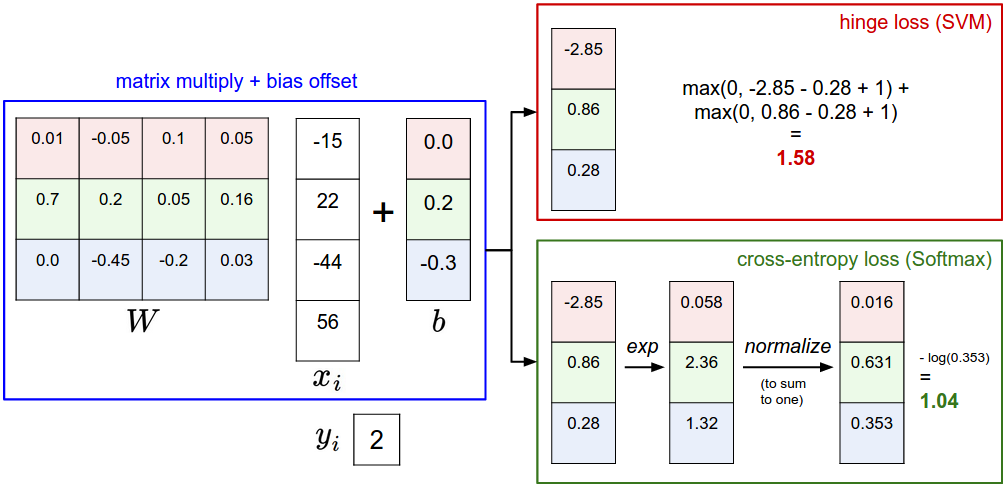